# Brain Tumor Classifier

A CNN for the classification of brain tumors. 

In [1]:
import torch 
from torch import nn, optim
from torchvision import datasets, transforms 
from torch.utils.data import DataLoader
import random 
import matplotlib.pyplot as plt 
from torchvision.transforms.functional import to_pil_image

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
folder_path = "D:\\Neural_Networks\\Brain_Tumor_Classifier\\Data\\"
tf = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])

train_dl = DataLoader(
    datasets.ImageFolder(folder_path + 'Training',tf),
    batch_size = 32, shuffle = True, num_workers = 4, pin_memory = True
)

test_dl = DataLoader(
    datasets.ImageFolder(folder_path +'Test',tf),
    batch_size = 32, shuffle = False, num_workers = 4, pin_memory = True
)

In [4]:
model = nn.Sequential(
    nn.Conv2d(3,32, 3, 1, 1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Conv2d(32,64, 3, 1, 1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Conv2d(64,128, 3, 1, 1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(128 * 16 * 16, 256), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(256,4) # 4 Classes
).to(device)

In [5]:
opt = optim.AdamW(model.parameters(), 1e-4)
loss_fn = nn.CrossEntropyLoss()

In [6]:
model.train()

for epoch in range(25):
    running_loss = 0

    for x,y in train_dl:
        opt.zero_grad()

        loss = loss_fn(model(x.to(device)),  y.to(device))
        loss.backward()

        running_loss += loss 

        opt.step()

    print(f"Epoch {epoch +1}: Loss was {running_loss}")

D:\Anaconda\envs\Machine_Learning\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 1: Loss was 146.93756103515625
Epoch 2: Loss was 98.01490020751953
Epoch 3: Loss was 82.32219696044922
Epoch 4: Loss was 72.43574523925781
Epoch 5: Loss was 63.52324295043945
Epoch 6: Loss was 57.316009521484375
Epoch 7: Loss was 51.09290313720703
Epoch 8: Loss was 45.12037658691406
Epoch 9: Loss was 41.07704162597656
Epoch 10: Loss was 38.211158752441406
Epoch 11: Loss was 32.58597946166992
Epoch 12: Loss was 29.242708206176758
Epoch 13: Loss was 27.636507034301758
Epoch 14: Loss was 24.275531768798828
Epoch 15: Loss was 22.362245559692383
Epoch 16: Loss was 19.645057678222656
Epoch 17: Loss was 17.5186767578125
Epoch 18: Loss was 15.775269508361816
Epoch 19: Loss was 15.596597671508789
Epoch 20: Loss was 14.152999877929688
Epoch 21: Loss was 12.815605163574219
Epoch 22: Loss was 12.311868667602539
Epoch 23: Loss was 10.896124839782715
Epoch 24: Loss was 10.098093032836914
Epoch 25: Loss was 8.38089370727539


In [7]:
model.eval()
test_loss, correct = 0.0, 0

with torch.no_grad():
    for x,y in test_dl:
        x, y = x.to(device), y.to(device)

        logits = model(x)
        test_loss += loss_fn(logits, y).item() * y.size(0)

        preds = logits.argmax(dim = 1)
        correct += (preds == y).sum().item()

test_loss /= len(test_dl.dataset)
accuracy = 100.0 * correct / len(test_dl.dataset)

print('Test Loss:', test_loss, 'Test Accuracy', accuracy, '%')

Test Loss: 0.1323116354129798 Test Accuracy 96.26239511823036 %


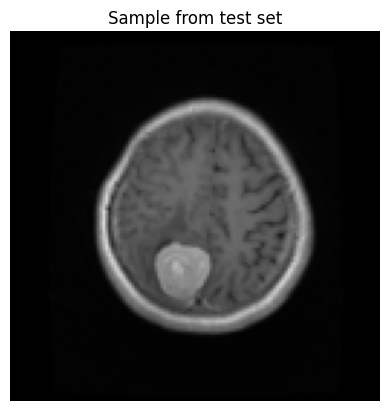

Predicted Class: meningioma
Ground-Truth: meningioma


In [11]:
model.eval()

idx = random.randrange(len(test_dl.dataset))
img, label = test_dl.dataset[idx]

unnorm = img * 0.5 + 0.5 
plt.imshow(to_pil_image(unnorm))
plt.axis('off')
plt.title('Sample from test set')
plt.show()

with torch.no_grad():
    logits = model(img.unsqueeze(0).to(device))
    pred = logits.argmax(1).item()

class_names = test_dl.dataset.classes 

print(f"Predicted Class: {class_names[pred]}")
print(f"Ground-Truth: {class_names[label]}")
